In [2]:
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from denoising_score import ScoreNet, dsm

#訓練データ
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download = True)
#検証データ
test_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=False,
                                           transform=transforms.ToTensor(),
                                           download = True)

Failed to download (trying next):
<urlopen error [Errno 60] Operation timed out>



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 60] Operation timed out>



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 60] Operation timed out>



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 60] Operation timed out>



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
batch_size = 600
train_loader = torch.utils.data.DataLoader(
    train_dataset,         
    batch_size=batch_size,  
    shuffle=True,          
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=True,
)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
epochs = 1000
sigma = 0.1
score = ScoreNet(784)
optimizer = torch.optim.Adam(score.parameters(), lr=0.005)
for epoch in range(epochs):
    for x, _ in train_loader:
        x = x.view(x.size(0), -1).to(device)
        x_tilde = x + torch.randn_like(x) * sigma
        target = -(x_tilde - x)/(sigma**2)
        s_theta = score(x_tilde)
        loss = dsm(s_theta, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch == 0 or (epoch+1) %100 == 0:
        print(f"epoch={epoch+1}, loss={loss.item()}")
torch.save(score, 'model.pth')

cpu
epoch=1, loss=78056.1484375
epoch=100, loss=76252.796875
epoch=200, loss=76653.328125
epoch=300, loss=76358.359375
epoch=400, loss=76193.2578125
epoch=500, loss=76316.1640625


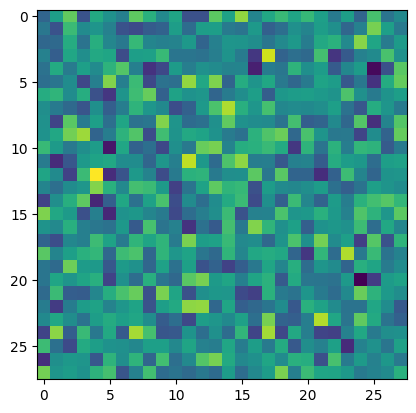

In [63]:
from sampling import langevin_step as step
x = torch.randn(784)
alpha = 0.01
K = 10000
samples = []
plt.imshow(x.clone().view(28,28).detach().numpy())
for i in range(K):
    if i == 0 or (i+1) % 20 == 0:
        samples.append(x)
    x = step(x, score, alpha)
plt.show()

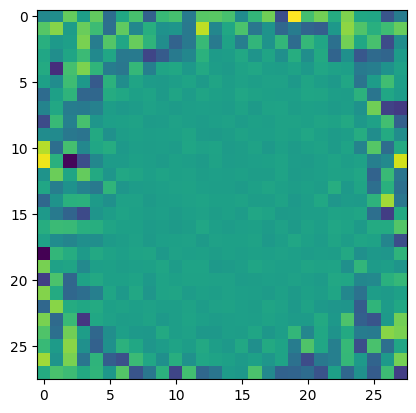

In [64]:
import matplotlib.pyplot as plt
_ = x.view(28,28).detach().numpy()
plt.imshow(_)